### This notebook is to process whole Basketball Dataset

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score, jaccard_score

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV


import warnings
warnings.filterwarnings('ignore')

import pickle
from pickle import dump, load

from pycaret.classification import *


pd.options.display.max_columns= None
#pd.options.display.max_rows = None

### Data Exploration

In [2]:
df = pd.read_csv("basketball_train.csv")

In [3]:
df

TEAM CONF   G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  \
0     North Carolina  ACC  40  33  123.3   94.9   0.9531   52.6   48.1  15.4   
1          Villanova   BE  40  35  123.1   90.9   0.9703   56.1   46.7  16.3   
2         Notre Dame  ACC  36  24  118.3  103.3   0.8269   54.0   49.5  15.3   
3           Virginia  ACC  37  29  119.9   91.0   0.9600   54.8   48.4  15.1   
4             Kansas  B12  37  32  120.9   90.4   0.9662   55.7   45.1  17.8   
...              ...  ...  ..  ..    ...    ...      ...    ...    ...   ...   
1752            UCLA  P12  36  22  111.8   96.6   0.8425   49.6   48.5  17.6   
1753            Utah  P12  34  25  114.9   88.7   0.9513   55.2   43.0  18.2   
1754   West Virginia  B12  35  25  110.3   93.3   0.8733   46.1   52.7  18.7   
1755     Wichita St.  MVC  34  29  114.3   91.5   0.9277   50.3   45.8  15.0   
1756          Xavier   BE  37  23  115.7   95.1   0.9049   53.3   50.0  18.1   

      TORD   ORB   DRB   FTR  FTRD  2P_O  2P_D  3P_O  3P_D  ADJ_T   WAB  \
0     18.2  40.7  30.0  32.3  30.4  53.9  44.6  32.7  36.2   71.7   8.6   
1     20.6  28.2  29.4  34.1  30.0  57.4  44.1  36.2  33.9   66.7   8.9   
2     14.8  32.7  32.1  32.9  26.0  52.9  46.5  37.4  36.9   65.5   2.3   
3     18.8  29.9  25.2  32.1  33.4  52.6  46.3  40.3  34.7   61.9   8.6   
4     18.5  32.2  27.9  38.6  37.3  52.7  43.4  41.3  32.5   70.1  11.6   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   ...   
1752  17.9  33.8  28.6  35.7  32.3  47.4  45.4  36.8  35.6   66.8   0.0   
1753  18.3  31.3  28.4  43.4  34.3  52.3  41.4  40.1  31.2   61.4   3.7   
1754  28.0  40.1  31.1  40.4  55.5  45.5  51.8  31.6  36.5   68.6   4.1   
1755  21.3  34.5  27.4  36.2  36.6  48.9  42.6  35.4  35.3   62.6   4.2   
1756  18.8  31.3  27.3  38.5  33.3  53.7  48.9  35.1  34.6   65.5   1.3   

     POSTSEASON  SEED  YEAR  
0           2ND   1.0  2016  
1     Champions   2.0  2016  
2            E8   6.0  2016  
3            E8   1.0  2016  
4            E8   1.0  2016  
...         ...   ...   ...  
1752        S16  11.0  2020  
1753        S16   5.0  2020  
1754        S16   5.0  2020  
1755        S16   7.0  2020  
1756        S16   6.0  2020  

[1757 rows x 24 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TEAM        1757 non-null   object 
 1   CONF        1757 non-null   object 
 2   G           1757 non-null   int64  
 3   W           1757 non-null   int64  
 4   ADJOE       1757 non-null   float64
 5   ADJDE       1757 non-null   float64
 6   BARTHAG     1757 non-null   float64
 7   EFG_O       1757 non-null   float64
 8   EFG_D       1757 non-null   float64
 9   TOR         1757 non-null   float64
 10  TORD        1757 non-null   float64
 11  ORB         1757 non-null   float64
 12  DRB         1757 non-null   float64
 13  FTR         1757 non-null   float64
 14  FTRD        1757 non-null   float64
 15  2P_O        1757 non-null   float64
 16  2P_D        1757 non-null   float64
 17  3P_O        1757 non-null   float64
 18  3P_D        1757 non-null   float64
 19  ADJ_T       1757 non-null  

In [5]:
df.describe(include='all')

TEAM  CONF            G            W        ADJOE        ADJDE  \
count   1757  1757  1757.000000  1757.000000  1757.000000  1757.000000   
unique   355    33          NaN          NaN          NaN          NaN   
top     Iowa   ACC          NaN          NaN          NaN          NaN   
freq       5    75          NaN          NaN          NaN          NaN   
mean     NaN   NaN    31.523051    16.513375   103.542402   103.542459   
std      NaN   NaN     2.602819     6.545571     7.304975     6.472676   
min      NaN   NaN    24.000000     0.000000    76.700000    84.000000   
25%      NaN   NaN    30.000000    12.000000    98.600000    98.900000   
50%      NaN   NaN    31.000000    16.000000   103.100000   103.800000   
75%      NaN   NaN    33.000000    21.000000   108.100000   108.000000   
max      NaN   NaN    40.000000    38.000000   129.100000   124.000000   

            BARTHAG        EFG_O        EFG_D          TOR         TORD  \
count   1757.000000  1757.000000  1757.000000  1757.000000  1757.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean       0.493398    50.120489    50.312806    18.591804    18.521286   
std        0.255291     3.130430     2.859604     1.991637     2.108968   
min        0.007700    39.400000    39.600000    12.400000    10.200000   
25%        0.283700    48.100000    48.400000    17.200000    17.100000   
50%        0.474000    50.000000    50.300000    18.500000    18.500000   
75%        0.710600    52.100000    52.300000    19.800000    19.900000   
max        0.984200    59.800000    59.500000    26.100000    28.000000   

                ORB          DRB          FTR         FTRD         2P_O  \
count   1757.000000  1757.000000  1757.000000  1757.000000  1757.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean      29.277120    29.467445    35.097894    35.373307    49.135970   
std        4.101782     3.061786     4.884599     5.900935     3.422136   
min       15.000000    18.400000    21.600000    21.800000    37.700000   
25%       26.600000    27.300000    31.700000    31.200000    46.900000   
50%       29.400000    29.400000    34.900000    34.900000    49.000000   
75%       31.900000    31.500000    38.300000    39.200000    51.400000   
max       42.100000    40.400000    51.000000    58.500000    62.600000   

               2P_D         3P_O         3P_D        ADJ_T          WAB  \
count   1757.000000  1757.000000  1757.000000  1757.000000  1757.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean      49.298065    34.563517    34.744792    68.422254    -7.837109   
std        3.288265     2.742323     2.369727     3.258920     6.988694   
min       37.700000    25.200000    27.100000    57.200000   -25.200000   
25%       47.100000    32.600000    33.100000    66.400000   -13.000000   
50%       49.300000    34.600000    34.700000    68.500000    -8.400000   
75%       51.500000    36.400000    36.300000    70.400000    -3.100000   
max       61.200000    44.100000    43.100000    83.400000    13.100000   

       POSTSEASON        SEED         YEAR  
count         340  340.000000  1757.000000  
unique          8         NaN          NaN  
top           R64         NaN          NaN  
freq          160         NaN          NaN  
mean          NaN    8.791176  2018.001138  
std           NaN    4.674090     1.414213  
min           NaN    1.000000  2016.000000  
25%           NaN    5.000000  2017.000000  
50%        

In [6]:
df.shape

(1757, 24)

In [7]:
df.columns

Index(['TEAM', 'CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'POSTSEASON', 'SEED', 'YEAR'],
      dtype='object')

### Data Exploration

In [8]:
df['POSTSEASON'].value_counts()

R64          160
R32           80
S16           40
E8            20
R68           20
F4            10
Champions      5
2ND            5
Name: POSTSEASON, dtype: int64

In [9]:
df['SEED'].value_counts()

16.0    30
11.0    30
3.0     21
5.0     20
14.0    20
12.0    20
15.0    20
13.0    20
7.0     20
9.0     20
8.0     20
10.0    20
6.0     20
2.0     20
1.0     20
4.0     19
Name: SEED, dtype: int64

In [10]:
df['YEAR'].value_counts()

2019    353
2020    351
2018    351
2017    351
2016    351
Name: YEAR, dtype: int64

### Data Visualization

### Univariate Data Exploration

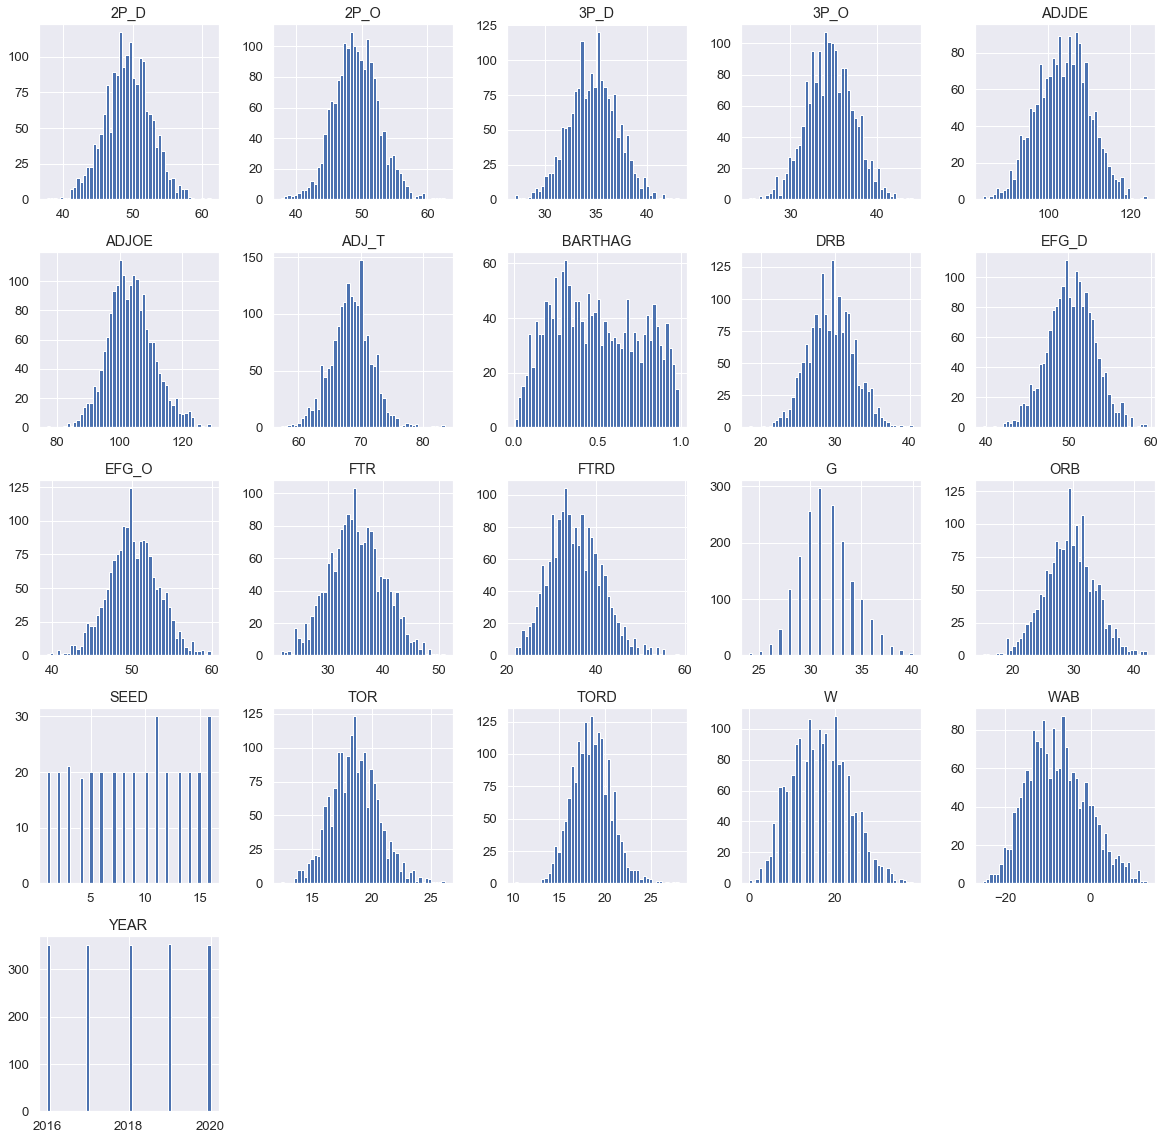

In [11]:
df.hist(bins=50, figsize=(20,20))
plt.show()

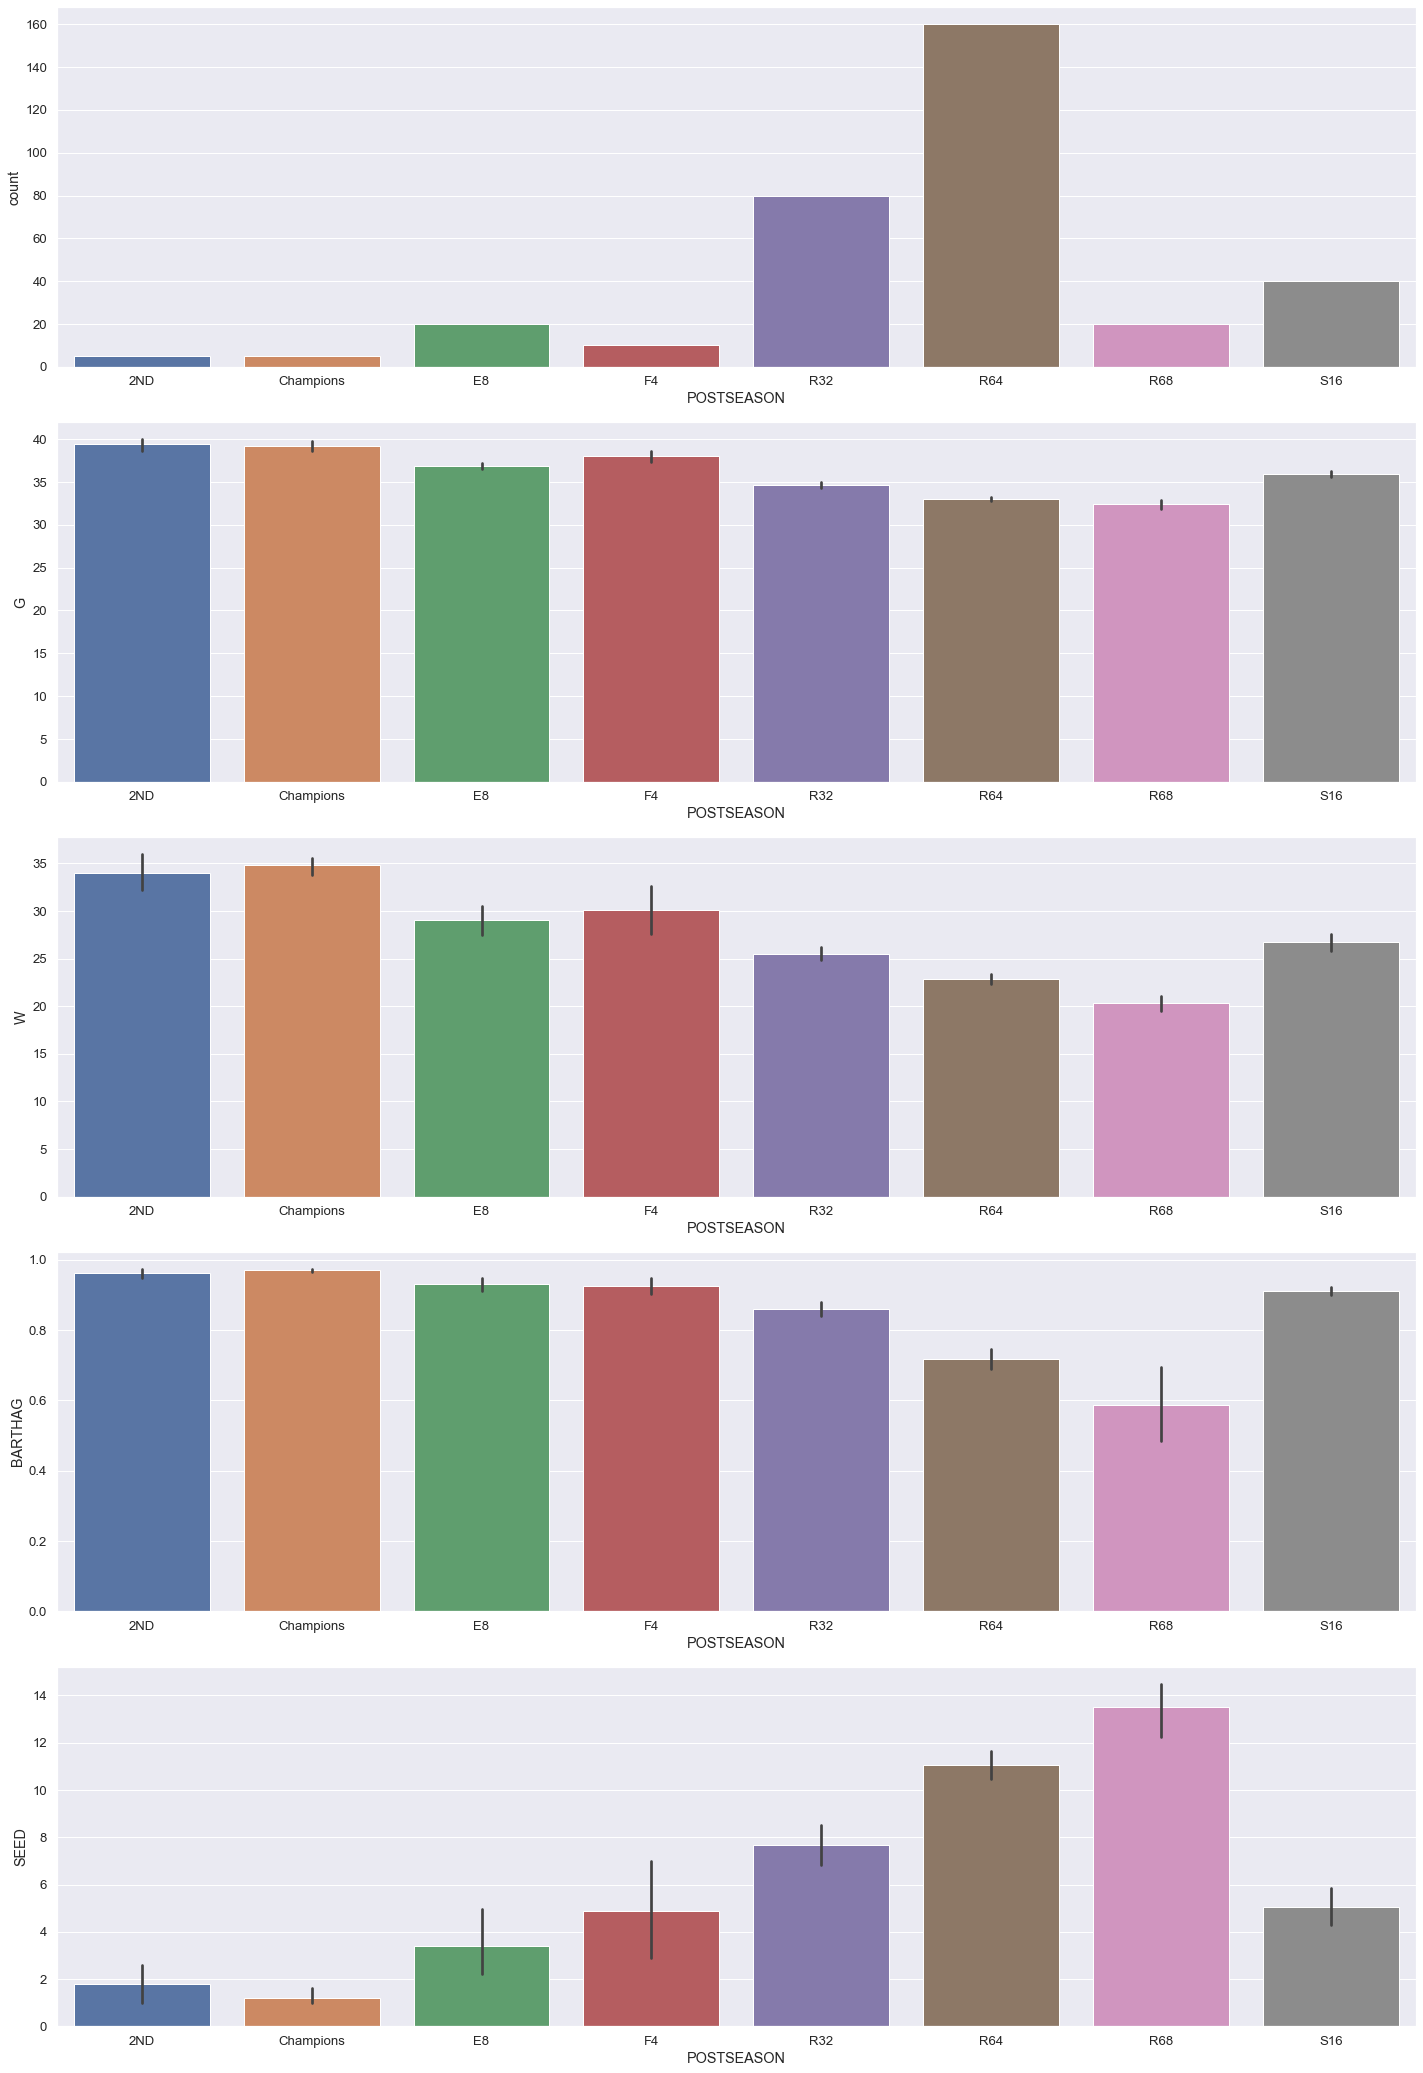

In [12]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,1,1)
sns.countplot(df.POSTSEASON)

plt.subplot(7,1,2)
sns.barplot(x=df.POSTSEASON, y=df.G)

plt.subplot(7,1,3)
sns.barplot(x=df.POSTSEASON, y=df.W)

plt.subplot(7,1,4)
sns.barplot(x=df.POSTSEASON, y=df.BARTHAG)

plt.subplot(7,1,5)
sns.barplot(x=df.POSTSEASON, y=df.SEED)

plt.tight_layout()
plt.show()

In [13]:
df.corr()

G         W     ADJOE     ADJDE   BARTHAG     EFG_O     EFG_D  \
G        1.000000  0.708838  0.613432 -0.606166  0.688059  0.346425 -0.481942   
W        0.708838  1.000000  0.754532 -0.690753  0.814512  0.617839 -0.609144   
ADJOE    0.613432  0.754532  1.000000 -0.528576  0.870686  0.732683 -0.333693   
ADJDE   -0.606166 -0.690753 -0.528576  1.000000 -0.852432 -0.221381  0.792320   
BARTHAG  0.688059  0.814512  0.870686 -0.852432  1.000000  0.543153 -0.627696   
EFG_O    0.346425  0.617839  0.732683 -0.221381  0.543153  1.000000 -0.120335   
EFG_D   -0.481942 -0.609144 -0.333693  0.792320 -0.627696 -0.120335  1.000000   
TOR     -0.336407 -0.467073 -0.601024  0.219779 -0.472329 -0.367975  0.101070   
TORD     0.065020  0.138805 -0.116231 -0.234615  0.054377 -0.144287 -0.020831   
ORB      0.261046  0.296395  0.261351 -0.294066  0.310917 -0.147990 -0.341636   
DRB     -0.184134 -0.366715 -0.266665  0.347646 -0.337804 -0.319901  0.172261   
FTR      0.090549  0.126931  0.063637 -0.125265  0.112072 -0.083514 -0.205807   
FTRD    -0.279593 -0.329245 -0.382290  0.180823 -0.327932 -0.404445  0.107161   
2P_O     0.339290  0.585806  0.646011 -0.251354  0.512045  0.893530 -0.148439   
2P_D    -0.439340 -0.529558 -0.328822  0.728488 -0.588121 -0.104079  0.907933   
3P_O     0.225821  0.432743  0.579193 -0.102715  0.386597  0.763028 -0.043770   
3P_D    -0.349726 -0.485485 -0.198275  0.564135 -0.427750 -0.100545  0.722404   
ADJ_T   -0.040433 -0.016057  0.070476  0.227852 -0.079611  0.120142  0.273412   
WAB      0.666595  0.905029  0.851663 -0.809486  0.941776  0.562904 -0.629864   
SEED    -0.607807 -0.612284 -0.791692  0.706046 -0.832709 -0.275137  0.386928   
YEAR     0.000766  0.000491 -0.069803 -0.078965  0.001623 -0.062509 -0.067962   

              TOR      TORD       ORB       DRB       FTR      FTRD      2P_O  \
G       -0.336407  0.065020  0.261046 -0.184134  0.090549 -0.279593  0.339290   
W       -0.467073  0.138805  0.296395 -0.366715  0.126931 -0.329245  0.585806   
ADJOE   -0.601024 -0.116231  0.261351 -0.266665  0.063637 -0.382290  0.646011   
ADJDE    0.219779 -0.234615 -0.294066  0.347646 -0.125265  0.180823 -0.251354   
BARTHAG -0.472329  0.054377  0.310917 -0.337804  0.112072 -0.327932  0.512045   
EFG_O   -0.367975 -0.144287 -0.147990 -0.319901 -0.083514 -0.404445  0.893530   
EFG_D    0.101070 -0.020831 -0.341636  0.172261 -0.205807  0.107161 -0.148439   
TOR      1.000000  0.103437  0.134433  0.188585  0.161369  0.316898 -0.288945   
TORD     0.103437  1.000000  0.118496  0.289078  0.111844  0.392412 -0.079076   
ORB      0.134433  0.118496  1.000000  0.018964  0.280598  0.136233 -0.091259   
DRB      0.188585  0.289078  0.018964  1.000000  0.082964  0.235665 -0.299565   
FTR      0.161369  0.111844  0.280598  0.082964  1.000000  0.203173 -0.040561   
FTRD     0.316898  0.392412  0.136233  0.235665  0.203173  1.000000 -0.390594   
2P_O    -0.288945 -0.079076 -0.091259 -0.299565 -0.040561 -0.390594  1.000000   
2P_D     0.091686  0.027203 -0.341291  0.183057 -0.202888  0.088794 -0.119930   
3P_O    -0.333397 -0.177276 -0.143735 -0.225528 -0.093085 -0.267869  0.402768   
3P_D     0.066363 -0.106798 -0.197189  0.090050 -0.108273  0.103091 -0.138731   
ADJ_T   -0.102687 -0.065216 -0.105308  0.032497  0.039090 -0.000793  0.163304   
WAB     -0.470286  0.094765  0.332275 -0.303666  0.146079 -0.333798  0.530586   
SEED     0.291587  0.057411 -0.314659  0.114416  0.091152  0.250020 -0.235655   
YEAR     0.134538  0.121982  0.055432  0.076342 -0.045597 -0.040026 -0.044487   

             2P_D      3P_O      3P_D     ADJ_T       WAB      SEED      YEAR  
G       -0.439340  0.225821 -0.349726 -0.040433  0.666595 -0.607807  0.000766  
W       -0.529558  0.432743 -0.485485 -0.016057  0.905029 -0.612284  0.000491  
ADJOE   -0.328822  0.579193 -0.198275  0.070476  0.851663 -0.791692 -0.069803  
ADJDE    0.728488 -0.102715  0.564135  0.227852 -0.809486  0.706046 -0.078965  
BARTHAG -0.588121  0.386597 -0.427750 -0.079611  0

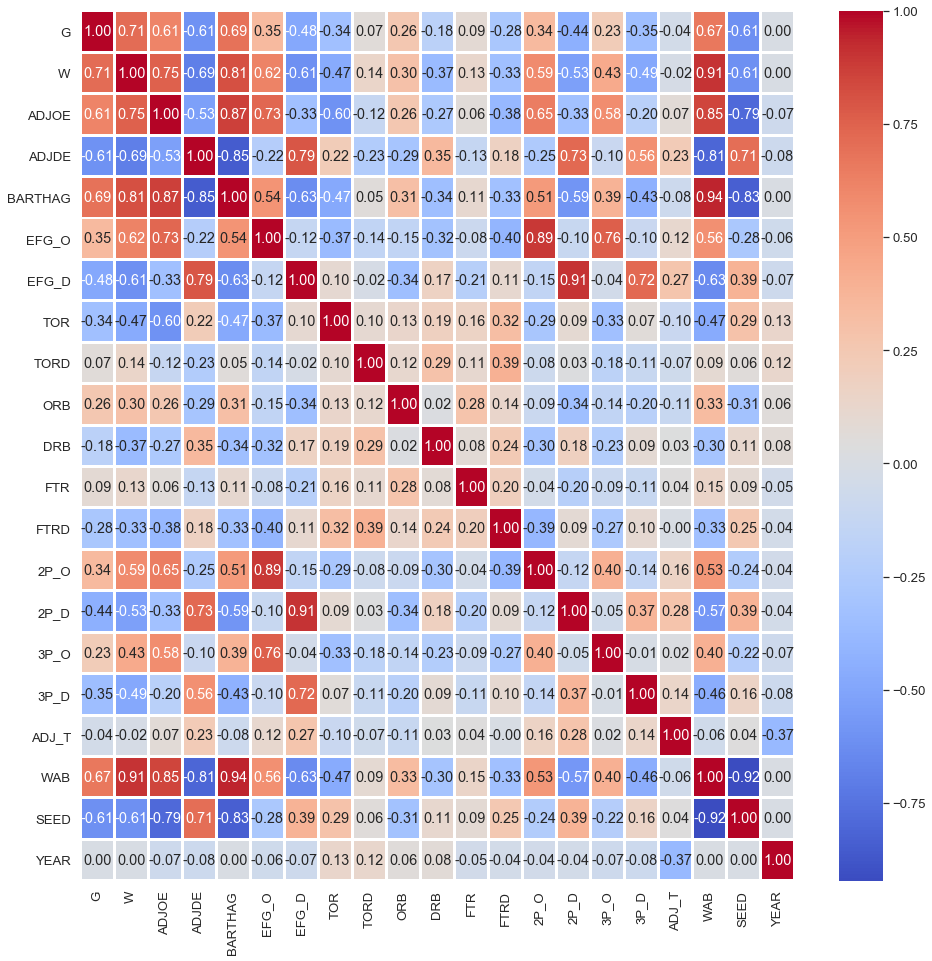

In [14]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

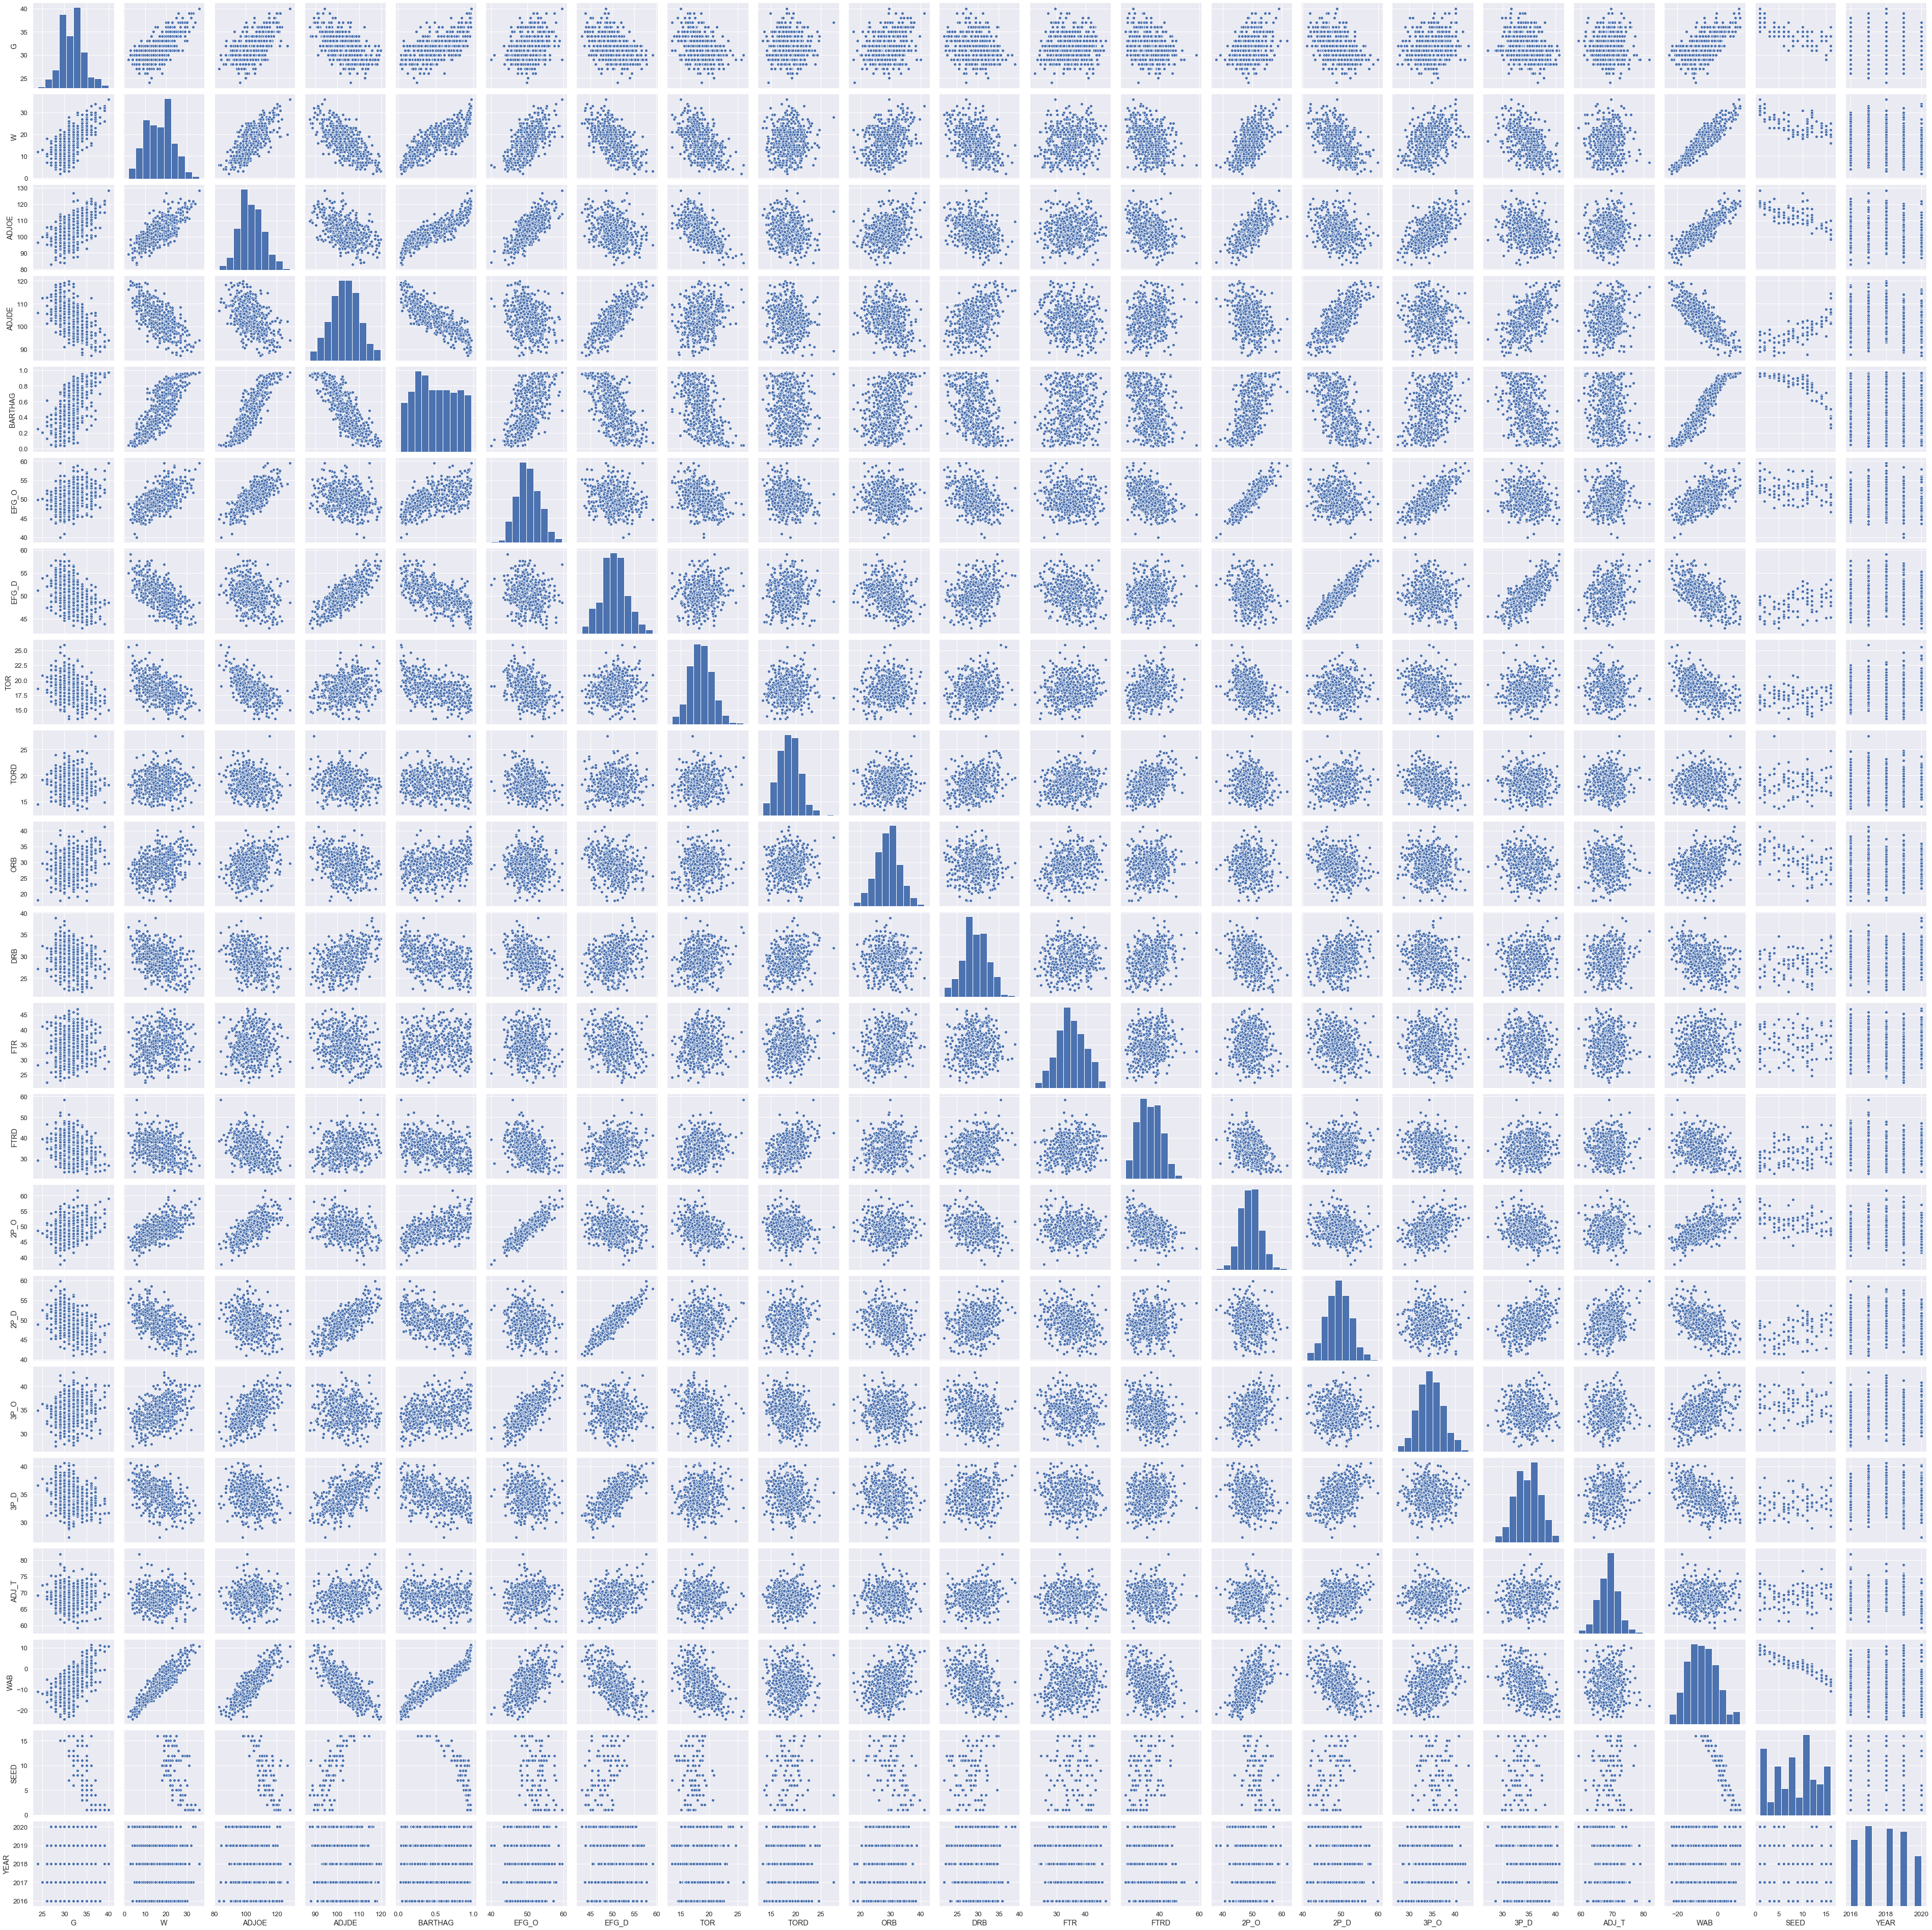

In [15]:
sns.pairplot(df.sample(500))
plt.show()

### Data Preprocessing

### Treat Missing Values

In [16]:
df.isnull().sum()

TEAM             0
CONF             0
G                0
W                0
ADJOE            0
ADJDE            0
BARTHAG          0
EFG_O            0
EFG_D            0
TOR              0
TORD             0
ORB              0
DRB              0
FTR              0
FTRD             0
2P_O             0
2P_D             0
3P_O             0
3P_D             0
ADJ_T            0
WAB              0
POSTSEASON    1417
SEED          1417
YEAR             0
dtype: int64

In [17]:
df.dropna(inplace=True)

In [18]:
df.isnull().sum()

TEAM          0
CONF          0
G             0
W             0
ADJOE         0
ADJDE         0
BARTHAG       0
EFG_O         0
EFG_D         0
TOR           0
TORD          0
ORB           0
DRB           0
FTR           0
FTRD          0
2P_O          0
2P_D          0
3P_O          0
3P_D          0
ADJ_T         0
WAB           0
POSTSEASON    0
SEED          0
YEAR          0
dtype: int64

In [19]:
df.reset_index(drop=True, inplace=True)

In [20]:
df

TEAM CONF   G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  \
0    North Carolina  ACC  40  33  123.3   94.9   0.9531   52.6   48.1  15.4   
1         Villanova   BE  40  35  123.1   90.9   0.9703   56.1   46.7  16.3   
2        Notre Dame  ACC  36  24  118.3  103.3   0.8269   54.0   49.5  15.3   
3          Virginia  ACC  37  29  119.9   91.0   0.9600   54.8   48.4  15.1   
4            Kansas  B12  37  32  120.9   90.4   0.9662   55.7   45.1  17.8   
..              ...  ...  ..  ..    ...    ...      ...    ...    ...   ...   
335            UCLA  P12  36  22  111.8   96.6   0.8425   49.6   48.5  17.6   
336            Utah  P12  34  25  114.9   88.7   0.9513   55.2   43.0  18.2   
337   West Virginia  B12  35  25  110.3   93.3   0.8733   46.1   52.7  18.7   
338     Wichita St.  MVC  34  29  114.3   91.5   0.9277   50.3   45.8  15.0   
339          Xavier   BE  37  23  115.7   95.1   0.9049   53.3   50.0  18.1   

     TORD   ORB   DRB   FTR  FTRD  2P_O  2P_D  3P_O  3P_D  ADJ_T   WAB  \
0    18.2  40.7  30.0  32.3  30.4  53.9  44.6  32.7  36.2   71.7   8.6   
1    20.6  28.2  29.4  34.1  30.0  57.4  44.1  36.2  33.9   66.7   8.9   
2    14.8  32.7  32.1  32.9  26.0  52.9  46.5  37.4  36.9   65.5   2.3   
3    18.8  29.9  25.2  32.1  33.4  52.6  46.3  40.3  34.7   61.9   8.6   
4    18.5  32.2  27.9  38.6  37.3  52.7  43.4  41.3  32.5   70.1  11.6   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   ...   
335  17.9  33.8  28.6  35.7  32.3  47.4  45.4  36.8  35.6   66.8   0.0   
336  18.3  31.3  28.4  43.4  34.3  52.3  41.4  40.1  31.2   61.4   3.7   
337  28.0  40.1  31.1  40.4  55.5  45.5  51.8  31.6  36.5   68.6   4.1   
338  21.3  34.5  27.4  36.2  36.6  48.9  42.6  35.4  35.3   62.6   4.2   
339  18.8  31.3  27.3  38.5  33.3  53.7  48.9  35.1  34.6   65.5   1.3   

    POSTSEASON  SEED  YEAR  
0          2ND   1.0  2016  
1    Champions   2.0  2016  
2           E8   6.0  2016  
3           E8   1.0  2016  
4           E8   1.0  2016  
..         ...   ...   ...  
335        S16  11.0  2020  
336        S16   5.0  2020  
337        S16   5.0  2020  
338        S16   7.0  2020  
339        S16   6.0  2020  

[340 rows x 24 columns]

In [21]:
df1 = df[df['POSTSEASON'].str.contains('F4|S16|E8', na=False)]

In [22]:
df1

TEAM CONF   G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  \
2       Notre Dame  ACC  36  24  118.3  103.3   0.8269   54.0   49.5  15.3   
3         Virginia  ACC  37  29  119.9   91.0   0.9600   54.8   48.4  15.1   
4           Kansas  B12  37  32  120.9   90.4   0.9662   55.7   45.1  17.8   
5           Oregon  P12  37  30  118.4   96.2   0.9163   52.3   48.9  16.1   
6         Syracuse  ACC  37  23  111.9   93.6   0.8857   50.0   47.3  18.1   
..             ...  ...  ..  ..    ...    ...      ...    ...    ...   ...   
335           UCLA  P12  36  22  111.8   96.6   0.8425   49.6   48.5  17.6   
336           Utah  P12  34  25  114.9   88.7   0.9513   55.2   43.0  18.2   
337  West Virginia  B12  35  25  110.3   93.3   0.8733   46.1   52.7  18.7   
338    Wichita St.  MVC  34  29  114.3   91.5   0.9277   50.3   45.8  15.0   
339         Xavier   BE  37  23  115.7   95.1   0.9049   53.3   50.0  18.1   

     TORD   ORB   DRB   FTR  FTRD  2P_O  2P_D  3P_O  3P_D  ADJ_T   WAB  \
2    14.8  32.7  32.1  32.9  26.0  52.9  46.5  37.4  36.9   65.5   2.3   
3    18.8  29.9  25.2  32.1  33.4  52.6  46.3  40.3  34.7   61.9   8.6   
4    18.5  32.2  27.9  38.6  37.3  52.7  43.4  41.3  32.5   70.1  11.6   
5    20.2  34.1  30.5  40.3  32.0  52.6  46.1  34.4  36.2   69.0   6.7   
6    20.4  33.5  35.3  35.4  28.0  47.2  48.1  36.0  30.7   65.5  -0.3   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   ...   
335  17.9  33.8  28.6  35.7  32.3  47.4  45.4  36.8  35.6   66.8   0.0   
336  18.3  31.3  28.4  43.4  34.3  52.3  41.4  40.1  31.2   61.4   3.7   
337  28.0  40.1  31.1  40.4  55.5  45.5  51.8  31.6  36.5   68.6   4.1   
338  21.3  34.5  27.4  36.2  36.6  48.9  42.6  35.4  35.3   62.6   4.2   
339  18.8  31.3  27.3  38.5  33.3  53.7  48.9  35.1  34.6   65.5   1.3   

    POSTSEASON  SEED  YEAR  
2           E8   6.0  2016  
3           E8   1.0  2016  
4           E8   1.0  2016  
5           E8   1.0  2016  
6           F4  10.0  2016  
..         ...   ...   ...  
335        S16  11.0  2020  
336        S16   5.0  2020  
337        S16   5.0  2020  
338        S16   7.0  2020  
339        S16   6.0  2020  

[70 rows x 24 columns]

In [23]:
df1["POSTSEASON"].value_counts()

S16    40
E8     20
F4     10
Name: POSTSEASON, dtype: int64

### Treat Duplicate Values

In [24]:
df1.duplicated(keep='first').sum()

0

### Drop unwanted features

In [25]:
df1.columns

Index(['TEAM', 'CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'POSTSEASON', 'SEED', 'YEAR'],
      dtype='object')

In [26]:
df1.drop(['TEAM', 'CONF', 'YEAR', 'POSTSEASON'],axis=1,inplace=True)

In [27]:
df1

G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  TORD   ORB   DRB  \
2    36  24  118.3  103.3   0.8269   54.0   49.5  15.3  14.8  32.7  32.1   
3    37  29  119.9   91.0   0.9600   54.8   48.4  15.1  18.8  29.9  25.2   
4    37  32  120.9   90.4   0.9662   55.7   45.1  17.8  18.5  32.2  27.9   
5    37  30  118.4   96.2   0.9163   52.3   48.9  16.1  20.2  34.1  30.5   
6    37  23  111.9   93.6   0.8857   50.0   47.3  18.1  20.4  33.5  35.3   
..   ..  ..    ...    ...      ...    ...    ...   ...   ...   ...   ...   
335  36  22  111.8   96.6   0.8425   49.6   48.5  17.6  17.9  33.8  28.6   
336  34  25  114.9   88.7   0.9513   55.2   43.0  18.2  18.3  31.3  28.4   
337  35  25  110.3   93.3   0.8733   46.1   52.7  18.7  28.0  40.1  31.1   
338  34  29  114.3   91.5   0.9277   50.3   45.8  15.0  21.3  34.5  27.4   
339  37  23  115.7   95.1   0.9049   53.3   50.0  18.1  18.8  31.3  27.3   

      FTR  FTRD  2P_O  2P_D  3P_O  3P_D  ADJ_T   WAB  SEED  
2    32.9  26.0  52.9  46.5  37.4  36.9   65.5   2.3   6.0  
3    32.1  33.4  52.6  46.3  40.3  34.7   61.9   8.6   1.0  
4    38.6  37.3  52.7  43.4  41.3  32.5   70.1  11.6   1.0  
5    40.3  32.0  52.6  46.1  34.4  36.2   69.0   6.7   1.0  
6    35.4  28.0  47.2  48.1  36.0  30.7   65.5  -0.3  10.0  
..    ...   ...   ...   ...   ...   ...    ...   ...   ...  
335  35.7  32.3  47.4  45.4  36.8  35.6   66.8   0.0  11.0  
336  43.4  34.3  52.3  41.4  40.1  31.2   61.4   3.7   5.0  
337  40.4  55.5  45.5  51.8  31.6  36.5   68.6   4.1   5.0  
338  36.2  36.6  48.9  42.6  35.4  35.3   62.6   4.2   7.0  
339  38.5  33.3  53.7  48.9  35.1  34.6   65.5   1.3   6.0  

[70 rows x 20 columns]

In [28]:
df1.reset_index(inplace=True, drop=True)

In [29]:
df1

G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  TORD   ORB   DRB   FTR  \
0   36  24  118.3  103.3   0.8269   54.0   49.5  15.3  14.8  32.7  32.1  32.9   
1   37  29  119.9   91.0   0.9600   54.8   48.4  15.1  18.8  29.9  25.2  32.1   
2   37  32  120.9   90.4   0.9662   55.7   45.1  17.8  18.5  32.2  27.9  38.6   
3   37  30  118.4   96.2   0.9163   52.3   48.9  16.1  20.2  34.1  30.5  40.3   
4   37  23  111.9   93.6   0.8857   50.0   47.3  18.1  20.4  33.5  35.3  35.4   
..  ..  ..    ...    ...      ...    ...    ...   ...   ...   ...   ...   ...   
65  36  22  111.8   96.6   0.8425   49.6   48.5  17.6  17.9  33.8  28.6  35.7   
66  34  25  114.9   88.7   0.9513   55.2   43.0  18.2  18.3  31.3  28.4  43.4   
67  35  25  110.3   93.3   0.8733   46.1   52.7  18.7  28.0  40.1  31.1  40.4   
68  34  29  114.3   91.5   0.9277   50.3   45.8  15.0  21.3  34.5  27.4  36.2   
69  37  23  115.7   95.1   0.9049   53.3   50.0  18.1  18.8  31.3  27.3  38.5   

    FTRD  2P_O  2P_D  3P_O  3P_D  ADJ_T   WAB  SEED  
0   26.0  52.9  46.5  37.4  36.9   65.5   2.3   6.0  
1   33.4  52.6  46.3  40.3  34.7   61.9   8.6   1.0  
2   37.3  52.7  43.4  41.3  32.5   70.1  11.6   1.0  
3   32.0  52.6  46.1  34.4  36.2   69.0   6.7   1.0  
4   28.0  47.2  48.1  36.0  30.7   65.5  -0.3  10.0  
..   ...   ...   ...   ...   ...    ...   ...   ...  
65  32.3  47.4  45.4  36.8  35.6   66.8   0.0  11.0  
66  34.3  52.3  41.4  40.1  31.2   61.4   3.7   5.0  
67  55.5  45.5  51.8  31.6  36.5   68.6   4.1   5.0  
68  36.6  48.9  42.6  35.4  35.3   62.6   4.2   7.0  
69  33.3  53.7  48.9  35.1  34.6   65.5   1.3   6.0  

[70 rows x 20 columns]

### Create and save processed dataset

In [30]:
df1.to_csv("train_whole.csv",index=False)

In [31]:
df = pd.read_csv("train_whole.csv")

In [32]:
df

G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  TORD   ORB   DRB   FTR  \
0   36  24  118.3  103.3   0.8269   54.0   49.5  15.3  14.8  32.7  32.1  32.9   
1   37  29  119.9   91.0   0.9600   54.8   48.4  15.1  18.8  29.9  25.2  32.1   
2   37  32  120.9   90.4   0.9662   55.7   45.1  17.8  18.5  32.2  27.9  38.6   
3   37  30  118.4   96.2   0.9163   52.3   48.9  16.1  20.2  34.1  30.5  40.3   
4   37  23  111.9   93.6   0.8857   50.0   47.3  18.1  20.4  33.5  35.3  35.4   
..  ..  ..    ...    ...      ...    ...    ...   ...   ...   ...   ...   ...   
65  36  22  111.8   96.6   0.8425   49.6   48.5  17.6  17.9  33.8  28.6  35.7   
66  34  25  114.9   88.7   0.9513   55.2   43.0  18.2  18.3  31.3  28.4  43.4   
67  35  25  110.3   93.3   0.8733   46.1   52.7  18.7  28.0  40.1  31.1  40.4   
68  34  29  114.3   91.5   0.9277   50.3   45.8  15.0  21.3  34.5  27.4  36.2   
69  37  23  115.7   95.1   0.9049   53.3   50.0  18.1  18.8  31.3  27.3  38.5   

    FTRD  2P_O  2P_D  3P_O  3P_D  ADJ_T   WAB  SEED  
0   26.0  52.9  46.5  37.4  36.9   65.5   2.3   6.0  
1   33.4  52.6  46.3  40.3  34.7   61.9   8.6   1.0  
2   37.3  52.7  43.4  41.3  32.5   70.1  11.6   1.0  
3   32.0  52.6  46.1  34.4  36.2   69.0   6.7   1.0  
4   28.0  47.2  48.1  36.0  30.7   65.5  -0.3  10.0  
..   ...   ...   ...   ...   ...    ...   ...   ...  
65  32.3  47.4  45.4  36.8  35.6   66.8   0.0  11.0  
66  34.3  52.3  41.4  40.1  31.2   61.4   3.7   5.0  
67  55.5  45.5  51.8  31.6  36.5   68.6   4.1   5.0  
68  36.6  48.9  42.6  35.4  35.3   62.6   4.2   7.0  
69  33.3  53.7  48.9  35.1  34.6   65.5   1.3   6.0  

[70 rows x 20 columns]

In [33]:
df.shape

(70, 20)

### Feature Scaling

In [34]:
scaler = StandardScaler()

In [35]:
df_scaled = scaler.fit_transform(df)

In [36]:
df_scaled

array([[-0.40807445, -1.10135297,  0.33736593, ..., -0.83664926,
        -0.99850054,  0.48431917],
       [ 0.36395829,  0.32632681,  0.70314507, ..., -2.00860931,
         0.98054997, -1.1940146 ],
       [ 0.36395829,  1.18293467,  0.93175703, ...,  0.66085525,
         1.92295497, -1.1940146 ],
       ...,
       [-1.18010718, -0.81581702, -1.49152974, ...,  0.17253856,
        -0.43305754,  0.14865242],
       [-1.95213992,  0.32632681, -0.5770819 , ..., -1.78072819,
        -0.40164404,  0.81998593],
       [ 0.36395829, -1.38688893, -0.25702516, ..., -0.83664926,
        -1.31263554,  0.48431917]])

In [37]:
new_scaled_dataset = pd.DataFrame(data=df_scaled,columns=df.columns)

In [38]:
new_scaled_dataset

G         W     ADJOE     ADJDE   BARTHAG     EFG_O     EFG_D  \
0  -0.408074 -1.101353  0.337366  2.664800 -2.468317  0.213703  0.944091   
1   0.363958  0.326327  0.703145 -0.713779  1.073708  0.482633  0.477499   
2   0.363958  1.182935  0.931757 -0.878587  1.238701  0.785179 -0.922276   
3   0.363958  0.611863  0.360227  0.714563 -0.089225 -0.357773  0.689586   
4   0.363958 -1.386889 -1.125751  0.000392 -0.903545 -1.130946  0.010907   
..       ...       ...       ...       ...       ...       ...       ...   
65 -0.408074 -1.672425 -1.148612  0.824436 -2.053173 -1.265411  0.519916   
66 -1.952140 -0.815817 -0.439915 -1.345545  0.842186  0.617098 -1.813042   
67 -1.180107 -0.815817 -1.491530 -0.082012 -1.233531 -2.441980  2.301448   
68 -1.952140  0.326327 -0.577082 -0.576438  0.214149 -1.030098 -0.625354   
69  0.363958 -1.386889 -0.257025  0.412414 -0.392599 -0.021610  1.156178   

         TOR      TORD       ORB       DRB       FTR      FTRD      2P_O  \
0  -1.192164 -1.643489  0.014541  1.295231 -0.623533 -0.931789  0.142784   
1  -1.329759 -0.068619 -0.735448 -1.354479 -0.806829  0.341738  0.049664   
2   0.527776 -0.186735 -0.119386 -0.317636  0.682450  1.012921  0.080704   
3  -0.641783  0.482585  0.389535  0.680805  1.071953  0.100800  0.049664   
4   0.734168  0.561329  0.228823  2.524082 -0.050734 -0.587592 -1.626500   
..       ...       ...       ...       ...       ...       ...       ...   
65  0.390181 -0.422965  0.309179 -0.048825  0.018002  0.152430 -1.564420   
66  0.802966 -0.265478 -0.360454 -0.125628  1.782225  0.496626 -0.043456   
67  1.146954  3.553581  1.996654  0.911215  1.094865  4.145107 -2.154182   
68 -1.398556  0.915674  0.496676 -0.509644  0.132562  0.892452 -1.098819   
69  0.734168 -0.068619 -0.360454 -0.548046  0.659538  0.324528  0.391105   

        2P_D      3P_O      3P_D     ADJ_T       WAB      SEED  
0   0.168876  0.284501  1.626260 -0.836649 -0.998501  0.484319  
1   0.094058  1.372141  0.693855 -2.008609  0.980550 -1.194015  
2  -0.990812  1.747189 -0.238550  0.660855  1.922955 -1.194015  
3   0.019239 -0.840644  1.329585  0.302756  0.383693 -1.194015  
4   0.767425 -0.240567 -1.001427 -0.836649 -1.815252  1.826986  
..       ...       ...       ...       ...       ...       ...  
65 -0.242626  0.059472  1.075293 -0.413441 -1.721011  2.162653  
66 -1.738997  1.297131 -0.789517 -2.171382 -0.558712  0.148652  
67  2.151568 -1.890779  1.456731  0.172539 -0.433058  0.148652  
68 -1.290086 -0.465596  0.948147 -1.780728 -0.401644  0.819986  
69  1.066699 -0.578110  0.651473 -0.836649 -1.312636  0.484319  

[70 rows x 20 columns]

### Save the Normalised Dataset

In [40]:
new_scaled_dataset.to_csv("train_whole_norm.csv",index=False)